# Titanic: Machine Learning from disaster

Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading data from .csv files

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Attributes

In [3]:
attributes = list(train_data)
attributes

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
train_data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Looking for missing values

In [5]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data types

In [6]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Counting values

In [7]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Cleaning data

Managing attribute 'Embarked'

In [10]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
train_data.Embarked.isna().sum()

2

In [12]:
train_data['Embarked'] = train_data['Embarked'].fillna('S') 

In [13]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Managing attribute 'Sex'

In [14]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Alternative: computing dummy variables / one-hot encoding

In [15]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Deleting attributes 'PassengerId', 'Name', 'Ticket' and 'Cabin' (not important to determine whether a passenger survived or not)

In [16]:
train_data_clean = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [17]:
train_data_clean.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Managing attribute 'Embarked'

In [18]:
train_data_clean['Embarked'] = train_data['Embarked'].map({'S':0, 'C':1, 'Q':2})
train_data_clean.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,NaN,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


Checking data types

In [19]:
train_data_clean.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [20]:
train_data_clean.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Managing attribute 'Age': two different methods

In [21]:
# age_method = 1
age_method = 2

### Method 1

In [22]:
def method_1(train_data_clean):
  # Method 1: https://www.kaggle.com/abhishekmamidi/titanic-data-preprocessing-and-visualization

  NaN_indexes = train_data_clean['Age'][train_data_clean['Age'].isnull()].index
  NaN_indexes

  for i in NaN_indexes:
      pred_age = train_data_clean['Age'][((train_data_clean.SibSp == train_data_clean.iloc[i]["SibSp"]) & (train_data_clean.Parch == train_data_clean.iloc[i]["Parch"]) & (train_data_clean.Pclass == train_data_clean.iloc[i]["Pclass"]))].median()
      if not np.isnan(pred_age):
          train_data_clean['Age'].iloc[i] = pred_age
      else:
          train_data_clean['Age'].iloc[i] = train_data_clean['Age'].median()

  return train_data_clean

### Method 2

In [23]:
def method_2(train_data_clean):
  fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
  axis1.set_title('Original Age values - Titanic')
  axis2.set_title('New Age values - Titanic')

  #Random values
  # get average, std, and number of NaN values in train_data_clean
  average_age_titanic   = train_data["Age"].mean()
  std_age_titanic       = train_data["Age"].std()
  count_nan_age_titanic = train_data["Age"].isnull().sum()

  # generate random numbers between (mean - std) & (mean + std)
  rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)

  #transform null into int
  train_data_clean['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

  # fill NaN values in Age column with random values generated
  train_data_clean["Age"][np.isnan(train_data_clean["Age"])] = rand_1

  # convert from float to int
  train_data_clean['Age'] = train_data_clean['Age'].astype(int)
          
  # plot new Age 
  train_data_clean['Age'].hist(bins=70, ax=axis2)

  return train_data_clean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


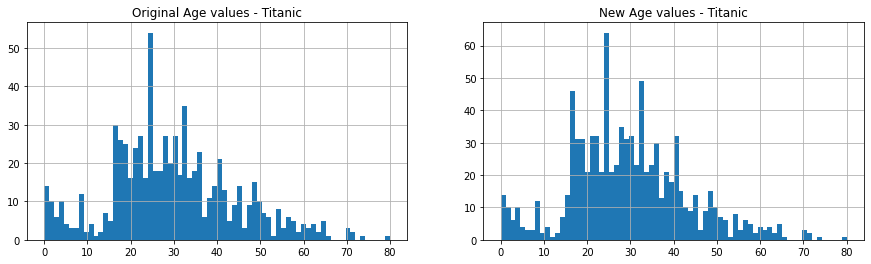

In [24]:
if age_method == 1:
  train_data_clean = method_1(train_data_clean)
elif age_method == 2:
  train_data_clean = method_2(train_data_clean)

Dataset is now clean

In [25]:
train_data_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
train_data_clean.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0
5,0,3,0,20,0,0,8.4583,2
6,0,1,0,54,0,0,51.8625,0
7,0,3,0,2,3,1,21.0750,0
8,1,3,1,27,0,2,11.1333,0
9,1,2,1,14,1,0,30.0708,1


In [27]:
train_data_clean.tail(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
881,0,3,0,33,0,0,7.8958,0
882,0,3,1,22,0,0,10.5167,0
883,0,2,0,28,0,0,10.5000,0
884,0,3,0,25,0,0,7.0500,0
885,0,3,1,39,0,5,29.1250,2
886,0,2,0,27,0,0,13.0000,0
887,1,1,1,19,0,0,30.0000,0
888,0,3,1,16,1,2,23.4500,0
889,1,1,0,26,0,0,30.0000,1
890,0,3,0,32,0,0,7.7500,2


# Correlation matrix

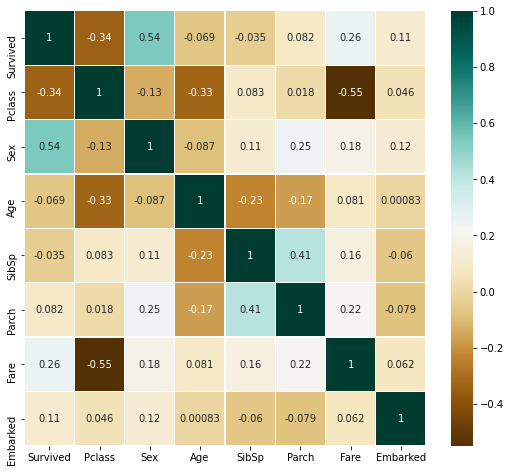

In [28]:
corr_matrix = train_data_clean.corr()

plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)